In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("./consumocobre.csv")

In [3]:
data.head()

,const,COPPERPRICE,INCOMEINDEX,ALUMPRICE,INVENTORYINDEX,World consumption,Date
0,1.0,26.56,0.70,19.76,0.98,3173.0,1951-01-01
1,1.0,27.31,0.71,20.78,1.04,3281.1,1952-01-01
2,1.0,32.95,0.72,22.55,1.05,3135.7,1953-01-01
3,1.0,33.90,0.70,23.06,0.97,3359.1,1954-01-01
4,1.0,42.70,0.74,24.93,1.02,3755.1,1955-01-01


In [4]:
exog=data.iloc[:, [0,1,2,3,4]]
endog=data["World consumption"]

In [5]:
mod = sm.RecursiveLS(endog, exog)
res = mod.fit()

print(res.summary())

                           Statespace Model Results                           
Dep. Variable:      World consumption   No. Observations:                   25
Model:                    RecursiveLS   Log Likelihood                -154.720
Date:                Sat, 19 Sep 2020   R-squared:                       0.965
Time:                        12:50:53   AIC                            319.441
Sample:                             0   BIC                            325.535
                                 - 25   HQIC                           321.131
Covariance Type:            nonrobust   Scale                       117717.127
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6562.3719   2378.939     -2.759      0.006   -1.12e+04   -1899.737
COPPERPRICE      -13.8132     15.041     -0.918      0.358     -43.292      15.666
INCOMEINDEX      1.21e+04    763.401

In [6]:
print(res.recursive_coefficients.filtered)

[[ 2.88890087e+00  4.94795049e+00  1.55841803e+03  1.95843327e+03
  -5.14749565e+04 -4.16895011e+03 -2.25261351e+03 -4.46559100e+02
  -5.28839794e+03 -6.94231935e+03 -7.84608902e+03 -6.64315120e+03
  -6.27411015e+03 -7.27201695e+03 -6.31902648e+03 -5.82223929e+03
  -6.25630902e+03 -6.73740445e+03 -6.47742841e+03 -5.99590746e+03
  -6.45080677e+03 -6.02292166e+03 -5.25835152e+03 -5.32089136e+03
  -6.56237193e+03]
 [ 7.67292070e+01  8.91626413e+01 -7.24320157e+01 -1.25789882e+02
  -5.10178079e+02 -1.26373910e+01  7.23724437e+00 -2.59788801e+00
  -1.13729174e+01 -1.33123718e+01 -1.29296104e+01 -1.45891952e+01
  -1.77586840e+01 -1.87853927e+01 -1.79198758e+01 -2.00013609e+01
  -2.81884164e+01 -3.56208868e+01 -3.36852635e+01 -2.55841971e+01
  -2.64046734e+01 -2.65060482e+01 -2.48828083e+01 -2.36894803e+01
  -1.38131830e+01]
 [ 2.02223061e+00  2.90016636e+00  8.22468233e+02  4.25539559e+02
   1.05755958e+05  1.43979665e+04  1.09464942e+04  5.49675966e+03
   1.37453903e+04  1.73240123e+04  2.2

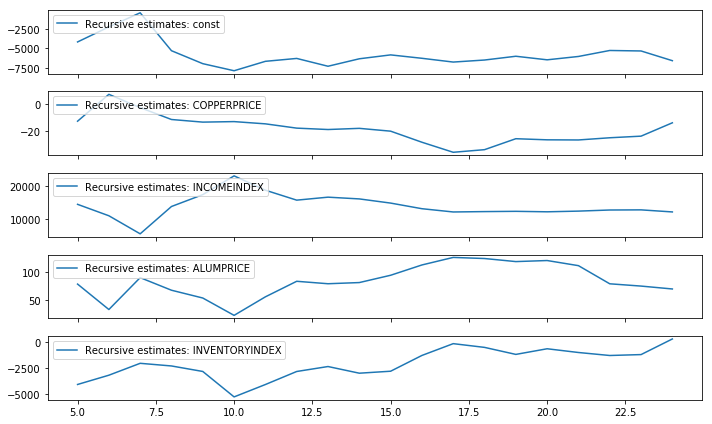

In [7]:
res.plot_recursive_coefficient(range(mod.k_exog), alpha=None, figsize=(10,6));

In [8]:
C=res.recursive_coefficients.filtered

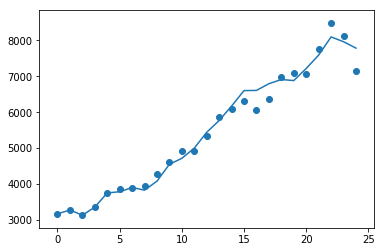

In [12]:
plt.plot(C[0]+C[1]*data.COPPERPRICE+C[2]*data.INCOMEINDEX+C[3]*data.ALUMPRICE+C[4]*data.INVENTORYINDEX)
#plt.plot(res.fittedvalues)
plt.scatter(range(len(data)),data['World consumption'])

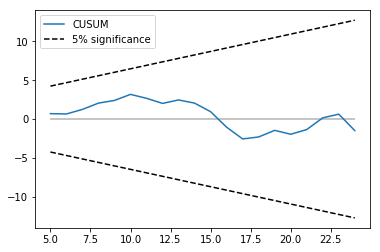

In [10]:
res.plot_cusum();